# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [5]:
# Your code here.
import pandas as pd

data = {'StudentID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
        'Age': [17, 51, 27, 21, 36, 48, 19, 26, 54, 30],
        'Tardies': [10, 1, 5, 9, 4, 2, 9, 6, 0, 3]}
student_data = pd.DataFrame(data)
student_data

,StudentID,Age,Tardies
0,1,17,10
1,2,51,1
2,3,27,5
3,4,21,9
4,5,36,4
5,6,48,2
6,7,19,9
7,8,26,6
8,9,54,0
9,10,30,3


Draw a dispersion diagram (scatter plot) for the data.

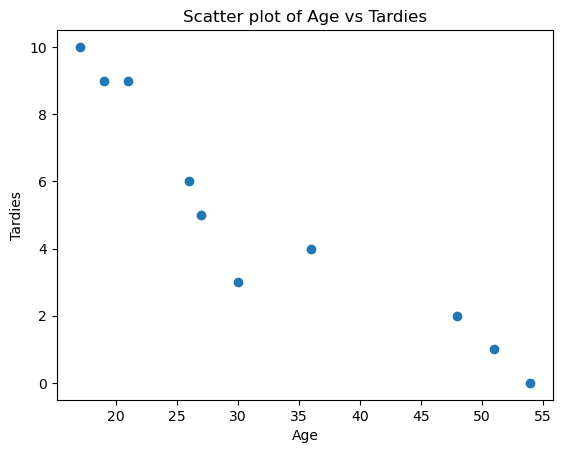

In [6]:
# Your code here.
import matplotlib.pyplot as plt


student_data = pd.DataFrame({'Age': [17, 51, 27, 21, 36, 48, 19, 26, 54, 30], 
                             'Tardies': [10, 1, 5, 9, 4, 2, 9, 6, 0, 3]})


plt.scatter(student_data['Age'], student_data['Tardies'])


plt.xlabel('Age')
plt.ylabel('Tardies')
plt.title('Scatter plot of Age vs Tardies')


plt.show()


Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [11]:
# Your response here. 
import pandas as pd


student_data = pd.DataFrame({
    'Age': [17, 51, 27, 21, 36, 48, 19, 26, 54, 30],
    'Tardies': [10, 1, 5, 9, 4, 2, 9, 6, 0, 3]
})


corr_coeff = student_data['Age'].corr(student_data['Tardies'], method='pearson')

print("The correlation coefficient between Age and Tardies is:", corr_coeff)


The correlation coefficient between Age and Tardies is: -0.9391626886887122


Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [13]:
# Your response here.
#correlation:

correlation = student_data['Age'].corr(student_data['Tardies'])

print(f"Correlation: {correlation}")


#covariance:
covariance = student_data['Age'].cov(student_data['Tardies'])
print(f"Covariance: {covariance}")


Correlation: -0.9391626886887122
Covariance: -45.56666666666666


Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [ ]:
# Your response here.
To build a regression model for this data, we can use linear regression. The outcome variable in this case is the number of tardies, and the predictor variable is the age.

Plot your regression model on your scatter plot.

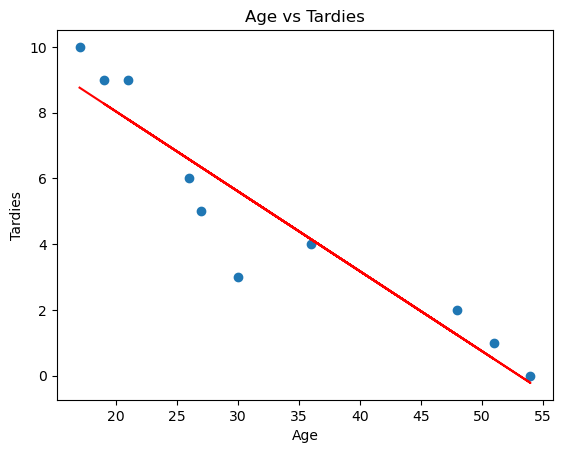

In [19]:
# Your code here.
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import linregress

# create a dataframe with the data
student_data = pd.DataFrame({'age': [17, 51, 27, 21, 36, 48, 19, 26, 54, 30], 
                             'tardies': [10, 1, 5, 9, 4, 2, 9, 6, 0, 3]})

# extract the x and y values
x_values = student_data['age']
y_values = student_data['tardies']

# calculate the regression line
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
regression_line = slope * x_values + intercept

# plot the scatter plot with the regression line
fig, ax = plt.subplots()
ax.scatter(x_values, y_values)
ax.plot(x_values, regression_line, color='red')
ax.set_xlabel('Age')
ax.set_ylabel('Tardies')
ax.set_title('Age vs Tardies')
plt.show()



Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [ ]:
# Your response here. 
#Based on the scatter plot and the regression line, we can see a negative correlation between age and tardiness, meaning that as age increases, tardiness tends to decrease. The regression line shows that the relationship between age and tardiness is fairly strong and we can be fairly confident in the model's ability to predict tardiness based on age.


## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [23]:
# Import any libraries you may need & the data
import pandas as pd
data = pd.read_csv('C:/Users/sanaz/OneDrive/Desktop/lab-list/week4/day4/lab1/lab-regression-analysis\your-code/vehicles.csv ')
variables = ['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year', 'CO2 Emission Grams/Mile']
data = data[variables]

correlations = data.corr()['CO2 Emission Grams/Mile'].drop('CO2 Emission Grams/Mile')
print(correlations)

Year                -0.222300
Cylinders            0.752393
Fuel Barrels/Year    0.986189
Combined MPG        -0.926229
Fuel Cost/Year       0.930865
Name: CO2 Emission Grams/Mile, dtype: float64


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [ ]:
# Your response here. 
Based on the correlation coefficients, we can see that the variable 'Fuel Barrels/Year' has the highest correlation with CO2 emissions (0.986189), and 'Year' has the lowest correlation with CO2 emissions (-0.222300). Therefore, it is likely that 'Fuel Barrels/Year' will be the most important variable in determining CO2 emissions, while 'Year' provides the least amount of helpful information for determining CO2 emissions.

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [27]:
# Your response here. 
import pandas as pd
import statsmodels.api as sm


data = pd.read_csv('C:/Users/sanaz/OneDrive/Desktop/lab-list/week4/day4/lab1/lab-regression-analysis/your-code/vehicles.csv')


variables = ['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year']
X = data[variables]
y = data['CO2 Emission Grams/Mile']


X = sm.add_constant(X)


model = sm.OLS(y, X).fit()




Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [26]:
# Your response here. 
import statsmodels.api as sm

X = data[['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year']]
y = data['CO2 Emission Grams/Mile']

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
print(model.summary())



                               OLS Regression Results                              
Dep. Variable:     CO2 Emission Grams/Mile   R-squared:                       0.981
Model:                                 OLS   Adj. R-squared:                  0.981
Method:                      Least Squares   F-statistic:                 3.687e+05
Date:                     Thu, 16 Feb 2023   Prob (F-statistic):               0.00
Time:                             18:13:14   Log-Likelihood:            -1.5173e+05
No. Observations:                    35952   AIC:                         3.035e+05
Df Residuals:                        35946   BIC:                         3.035e+05
Df Model:                                5                                         
Covariance Type:                 nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------

## Challenge 2: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [29]:
# Your code here.
import pandas as pd

data = {'X': [1, 3, 4, 6, 8, 9, 11, 14],
        'Y': [1, 2, 4, 4, 5, 7, 8, 13]}

df = pd.DataFrame(data)
df



,X,Y
0,1,1
1,3,2
2,4,4
3,6,4
4,8,5
5,9,7
6,11,8
7,14,13


Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

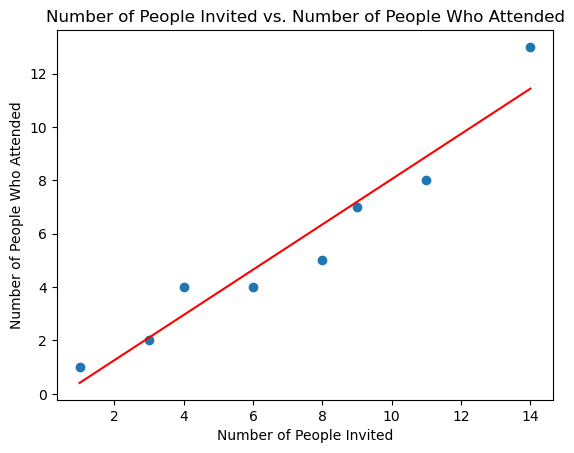

In [30]:
# Your code here.
import numpy as np
import matplotlib.pyplot as plt

# Create the dataframe
data = {'X': [1, 3, 4, 6, 8, 9, 11, 14],
        'Y': [1, 2, 4, 4, 5, 7, 8, 13]}
df = pd.DataFrame(data)

# Create scatter plot
plt.scatter(df['X'], df['Y'])
plt.title('Number of People Invited vs. Number of People Who Attended')
plt.xlabel('Number of People Invited')
plt.ylabel('Number of People Who Attended')

# Fit regression line
x = np.linspace(df['X'].min(), df['X'].max(), 100)
coefficients = np.polyfit(df['X'], df['Y'], 1)
y = np.polyval(coefficients, x)
plt.plot(x, y, color='red')

plt.show()



What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [ ]:
# Your response here. 
#The scatter plot shows a generally positive relationship between the number of people invited and the number of people who attend the party. As the number of people invited increases, there is a tendency for more people to attend. However, there are some exceptions, such as the case where 6 people were invited but only 4 people attended.


Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

slope: 0.6842105263157895
intercept: 0.32330827067669166
r_value: 0.971278116825086
p_value: 0.0002644056885656864
std_err: 0.07496206665031292


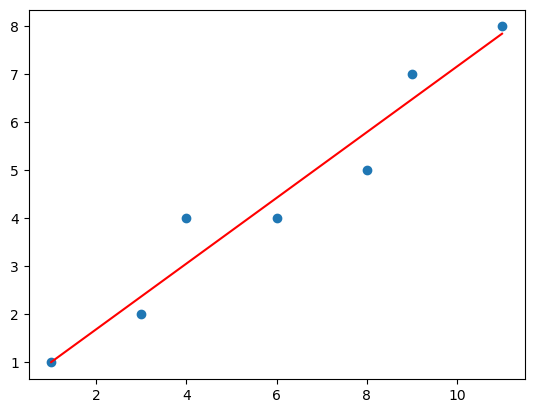

In [32]:
# Your response here. 

from scipy import stats

df_filtered = df[df['X'] <= 11]


plt.scatter(df_filtered['X'], df_filtered['Y'])


slope, intercept, r_value, p_value, std_err = stats.linregress(df_filtered['X'], df_filtered['Y'])
line = slope * df_filtered['X'] + intercept


plt.plot(df_filtered['X'], line, color='red')


print('slope:', slope)
print('intercept:', intercept)
print('r_value:', r_value)
print('p_value:', p_value)
print('std_err:', std_err)


What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [ ]:
# Your response here. 
#It seems that the outlier had a significant effect on the regression line, causing it to have a steeper slope and different intercept. After removing the outlier, the regression line has a shallower slope and different intercept, suggesting a weaker linear relationship between the variables. This demonstrates the importance of identifying and handling outliers appropriately in regression analysis.